In [162]:
import numpy as np
from time import perf_counter
import cv2


In [163]:
x = np.ones((5, 7), dtype=np.uint8)

# x = np.array([[1, 2, 3, 4, 5],
#               [6, 7, 8, 9, 10],
#               [11, 12, 13, 14, 15],
#               [16, 17, 18, 19, 20],
#               [21, 22, 23, 24, 25]])


In [164]:

def integralImg(img):
    nr = img.shape[0]
    nc = img.shape[1]
    intImg = np.zeros((nr, nc))
    for r in range(nr):
        for c in range(nc):
            intImg[r, c] = img[r, c]
            if r > 0:
                intImg[r, c] += intImg[r-1, c]
            if c > 0:
                intImg[r, c] += intImg[r, c-1]
            if r > 0 and c > 0:
                intImg[r, c] -= intImg[r-1, c-1]
    return intImg


def integralImgLC(img):
    nr = img.shape[0]
    nc = img.shape[1]
    intImg = np.zeros((nr, nc))
    intImg[0, 0] = img[0, 0]
    intImg[0, 1:] = img[0, :-1].cumsum()
    intImg[1:, 0] = img[:-1, 0].cumsum(axis=0)
    intImg[1:, 1:] = (intImg[:-1, 1:] + intImg[1:, :-1] -
                      intImg[:-1, :-1]) + img[1:, 1:]
    return intImg


ticks = perf_counter()
intImg = integralImg(x)
ticks = perf_counter() - ticks
print("Time: ", ticks)
print(intImg)

# ticks = perf_counter()
# intImg = integralImgLC(x)
# ticks = perf_counter() - ticks
# print("Time2: ", ticks)
# print(intImg)


Time:  9.358300303574651e-05
[[ 1.  2.  3.  4.  5.  6.  7.]
 [ 2.  4.  6.  8. 10. 12. 14.]
 [ 3.  6.  9. 12. 15. 18. 21.]
 [ 4.  8. 12. 16. 20. 24. 28.]
 [ 5. 10. 15. 20. 25. 30. 35.]]


In [165]:
def caja(intImg, r,c, n, m):
    N = 2*n+1
    M = 2*m+1
    pad = (N - 1) // 2

    nrows, ncols = intImg.shape

    r0 = r - pad
    c0 = c - pad
    r1 = r + pad
    c1 = c + pad

    if r1 >= nrows:
        r1 = nrows - 1
    if c1 >= ncols:
        c1 = ncols - 1

    s0 = intImg[r1, c1]
    s1 = 0
    s2 = 0
    s3 = 0

    if r0 > 0:
        s1 = intImg[r0-1, c1]
    if c0 > 0:
        s2 = intImg[r1, c0-1]
    if r0 > 0 and c0 > 0:
        s3 = intImg[r0-1, c0-1]
    out = s0 - s1 - s2 + s3
    return out

print(caja(intImg, 0, 6, 1, 1))



def cajaCompleta(img, n, m):

    N = 2*n+1
    M = 2*m+1

    kernelx = np.ones((N))
    kernely = np.ones((M))

    # print(kernelx)
    # print(kernely)

    nrows, ncols = img.shape
    k_size = kernelx.size
    # krows, kcols = kernel.shape
    pad_size = (k_size - 1) // 2
    padded_img = np.pad(img, pad_size, mode='constant')
    # print(padded_img)
    output = np.zeros((nrows, ncols))

    for i in range(nrows):
        # print(img[i,:], i )
        output[i, :] = convolveDot(img[i, :], kernelx)
    # print(output)
    output2 = np.zeros((nrows, ncols))

    for j in range(ncols):
        output2[:, j] = convolveDot(output[:, j], kernely)
        # print(img[:, j])
    # print(output2)
    return output2/(N*M)


def convolveDot(signal, kernel):
    ker_size = kernel.size
    sig_size = signal.size
    # kernel = kernel[::-1]
    pad_size = (ker_size - 1) // 2
    padded_signal = np.pad(signal, pad_size, mode='constant')
    output = np.zeros(sig_size)
    output = [np.dot(padded_signal[k:k+ker_size], kernel)
              for k in range(sig_size)]
    return output


def SuavizadoIntegral(imgIntegral, boxSize):
    N = 2*boxSize+1
    nrows, ncols = imgIntegral.shape
    pad = (N - 1) // 2
    integralSuavizada = np.zeros((nrows, ncols))

    for r in range(nrows):
        for c in range(ncols):
            r0 = r - pad
            c0 = c - pad
            r1 = r + pad
            c1 = c + pad

            if r1 >= nrows:
                r1 = nrows - 1
            if c1 >= ncols:
                c1 = ncols - 1

            s0 = imgIntegral[r1, c1]
            s1 = 0
            s2 = 0
            s3 = 0

            if r0 > 0:
                s1 = imgIntegral[r0-1, c1]
            if c0 > 0:
                s2 = imgIntegral[r1, c0-1]
            if r0 > 0 and c0 > 0:
                s3 = imgIntegral[r0-1, c0-1]
            integralSuavizada[r, c] = s0 - s1 - s2 + s3
    return integralSuavizada/(N*N)

ticks = perf_counter()
print(SuavizadoIntegral(intImg, 1))
ticks = perf_counter() - ticks
print("Time: ", ticks)

ticks = perf_counter()
print(cajaCompleta(x, 1, 1))
ticks = perf_counter() - ticks
print("Time: ", ticks)


ticks = perf_counter()
print(cv2.integral(x))
ticks = perf_counter() - ticks
print("Time: ", ticks)


4.0
[[0.44444444 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
  0.44444444]
 [0.66666667 1.         1.         1.         1.         1.
  0.66666667]
 [0.66666667 1.         1.         1.         1.         1.
  0.66666667]
 [0.66666667 1.         1.         1.         1.         1.
  0.66666667]
 [0.44444444 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
  0.44444444]]
Time:  0.00037354199957917444
[[0.44444444 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
  0.44444444]
 [0.66666667 1.         1.         1.         1.         1.
  0.66666667]
 [0.66666667 1.         1.         1.         1.         1.
  0.66666667]
 [0.66666667 1.         1.         1.         1.         1.
  0.66666667]
 [0.44444444 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
  0.44444444]]
Time:  0.0011199580003449228
[[ 0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7]
 [ 0  2  4  6  8 10 12 14]
 [ 0  3  6  9 12 15 18 21]
 [ 0  4  8 12 16 20 24 28]
 [ 0  5 10 15 20 25 30 35]]


In [166]:
# x = np.array([[1, 2, 3, 4, 5],
#               [6, 7, 8, 9, 10],
#               [11, 12, 13, 14, 15],
#               [16, 17, 18, 19, 20],
#               [21, 22, 23, 24, 25]])

ticks = perf_counter()
result = integralImg(x)
ticks = perf_counter() - ticks
print("Time: ", ticks)
print(result)


Time:  8.779199924902059e-05
[[ 1.  2.  3.  4.  5.  6.  7.]
 [ 2.  4.  6.  8. 10. 12. 14.]
 [ 3.  6.  9. 12. 15. 18. 21.]
 [ 4.  8. 12. 16. 20. 24. 28.]
 [ 5. 10. 15. 20. 25. 30. 35.]]


In [167]:
import numba as nb

@nb.jit(nopython=True)
def integralImg(img):
    nr, nc = img.shape
    intImg = np.zeros((nr, nc), dtype=np.int32)
    intImg[0, 0] = img[0, 0]
    for r in range(1, nr):
        intImg[r, 0] = intImg[r-1, 0] + img[r, 0]
    for c in range(1, nc):
        intImg[0, c] = intImg[0, c-1] + img[0, c]
    for r in range(1, nr):
        for c in range(1, nc):
            intImg[r, c] = (intImg[r-1, c] +
                            intImg[r, c-1] -
                            intImg[r-1, c-1] +
                            img[r, c])
    return intImg


In [168]:
# x = np.array([[1, 2, 3, 4, 5],
#               [6, 7, 8, 9, 10],
#               [11, 12, 13, 14, 15],
#               [16, 17, 18, 19, 20],
#               [21, 22, 23, 24, 25]])

ticks = perf_counter()
result = integralImg(x)
ticks = perf_counter() - ticks
print("Time: ", ticks)
print(result)


Time:  0.10587583300002734
[[ 1  2  3  4  5  6  7]
 [ 2  4  6  8 10 12 14]
 [ 3  6  9 12 15 18 21]
 [ 4  8 12 16 20 24 28]
 [ 5 10 15 20 25 30 35]]


In [169]:
@nb.jit(nopython=True, parallel=True)
def SuavizadoIntegral(imgIntegral, boxSize):
    N = 2*boxSize+1
    nrows, ncols = imgIntegral.shape
    pad = (N - 1) // 2
    integralSuavizada = np.zeros((nrows, ncols))

    for r in range(nrows):
        for c in range(ncols):
            r0 = r - pad
            c0 = c - pad
            r1 = r + pad
            c1 = c + pad

            if r1 >= nrows:
                r1 = nrows - 1
            if c1 >= ncols:
                c1 = ncols - 1

            s0 = imgIntegral[r1, c1]
            s1 = 0
            s2 = 0
            s3 = 0

            if r0 > 0:
                s1 = imgIntegral[r0-1, c1]
            if c0 > 0:
                s2 = imgIntegral[r1, c0-1]
            if r0 > 0 and c0 > 0:
                s3 = imgIntegral[r0-1, c0-1]
            integralSuavizada[r, c] = s0 - s1 - s2 + s3
    return integralSuavizada*1.0/(N*N)


In [170]:

ticks = perf_counter()
print(SuavizadoIntegral(intImg, 8001))
ticks = perf_counter() - ticks
print("Time: ", ticks)


[[1.36667495e-07 1.36667495e-07 1.36667495e-07 1.36667495e-07
  1.36667495e-07 1.36667495e-07 1.36667495e-07]
 [1.36667495e-07 1.36667495e-07 1.36667495e-07 1.36667495e-07
  1.36667495e-07 1.36667495e-07 1.36667495e-07]
 [1.36667495e-07 1.36667495e-07 1.36667495e-07 1.36667495e-07
  1.36667495e-07 1.36667495e-07 1.36667495e-07]
 [1.36667495e-07 1.36667495e-07 1.36667495e-07 1.36667495e-07
  1.36667495e-07 1.36667495e-07 1.36667495e-07]
 [1.36667495e-07 1.36667495e-07 1.36667495e-07 1.36667495e-07
  1.36667495e-07 1.36667495e-07 1.36667495e-07]]
Time:  0.35583616599978996


In [171]:
import urllib.request
import matplotlib.pyplot as plt
req = urllib.request.urlopen(
    'https://www.bioparcvalencia.es/wp-content/uploads/2017/06/ficha-animal-bioparc-valencia-chimpance.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


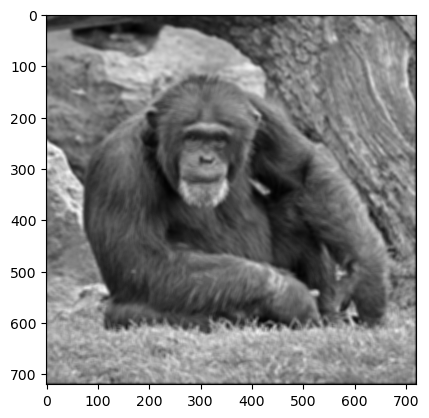

In [173]:
grayCaja = cajaCompleta(gray, 3, 3)
plt.imshow(grayCaja, cmap='gray')

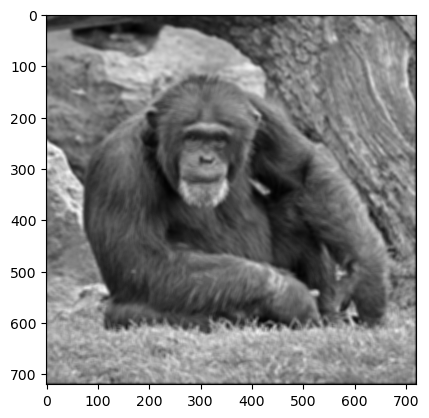

In [174]:
imgIntegral = integralImg(gray)
imSV = SuavizadoIntegral(imgIntegral, 3)
plt.imshow(imSV, cmap='gray')